### Liquor.com option (doesn't work)

In [1]:
import requests
from bs4 import BeautifulSoup

# URL of the website to scrape
url = 'https://www.liquor.com/recipes/popular/'

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Find the container for the popular recipes
popular_recipes_container = soup.find('div', class_='full-page-card-section full-page-card-section-recipes')

# Find the list of popular recipes
popular_recipes_list = popular_recipes_container.find('ul', class_='full-page-card-section-list')

# Iterate through each recipe in the list
for recipe_item in popular_recipes_list.find_all('li', class_='full-page-card-section-item'):
    # Find the recipe title
    recipe_title = recipe_item.find('h3', class_='full-page-card-section-title').text
    
    # Find the recipe ingredient list
    recipe_ingredient_list = recipe_item.find('div', class_='full-page-card-section-content').text.strip()
    
    # Print the recipe title and ingredient list
    print('Recipe Title:', recipe_title)
    print('Ingredient List:', recipe_ingredient_list)
    print('---')
    break

AttributeError: 'NoneType' object has no attribute 'find'

### Cocktail API
https://www.thecocktaildb.com/api.php

In [95]:
letter = 'c'

In [96]:
import requests

# API endpoint for searching cocktails by name
url = 'https://www.thecocktaildb.com/api/json/v1/1/search.php'

# Query parameters for searching cocktails
params = {
    'f': letter  # The letter to search for
}

all_ingredients = []

# Send a GET request to the API endpoint with the query parameters
response = requests.get(url, params=params)

# Parse the JSON response
data = response.json()

# Check if the request was successful
if response.status_code == 200 and data['drinks'] is not None:
    # Loop through each cocktail in the response
    for cocktail in data['drinks']:
        # Extract the cocktail name and ingredient list
        cocktail_name = cocktail['strDrink']
        ingredient_list = []
        for i in range(1, 16):
            ingredient = cocktail['strIngredient' + str(i)]
            if ingredient:
                ingredient_list.append(ingredient)

        all_ingredients.append(ingredient_list)
        
        # Print the cocktail name and ingredient list
        print('Cocktail Name:', cocktail_name)
        print('Ingredient List:', ', '.join(ingredient_list))
        print('---')
else:
    print('No cocktails found.')

Cocktail Name: Casino
Ingredient List: Gin, Maraschino liqueur, Lemon juice, Orange bitters, Cherry
---
Cocktail Name: Cafe Savoy
Ingredient List: Coffee, Milk, Triple sec, Brandy
---
Cocktail Name: Caipirinha
Ingredient List: Sugar, Lime, Cachaca
---
Cocktail Name: Cream Soda
Ingredient List: Spiced rum, Ginger ale
---
Cocktail Name: Cuba Libra
Ingredient List: Dark rum, Lime, Coca-Cola, Ice
---
Cocktail Name: Cherry Rum
Ingredient List: Light rum, Cherry brandy, Light cream
---
Cocktail Name: Cuba Libre
Ingredient List: Light rum, Lime, Coca-Cola
---
Cocktail Name: Corn n Oil
Ingredient List: Lime, Falernum, Angostura Bitters, Añejo rum, blackstrap rum
---
Cocktail Name: Citrus Coke
Ingredient List: Bacardi Limon, Coca-Cola
---
Cocktail Name: Casa Blanca
Ingredient List: Light rum, Triple sec, Lime juice, Maraschino liqueur
---
Cocktail Name: Clover Club
Ingredient List: Gin, Grenadine, Lemon, Egg white
---
Cocktail Name: Caipirissima
Ingredient List: Lime, Sugar, White rum, Ice
---


In [93]:
# import itertools
# import networkx as nx
# import matplotlib.pyplot as plt

# # List of ingredients
# # ingredients = all_ingredients[0]
# # ingredients.append('Cherry')
# # print(ingredients)

# # Create a graph object
# G = {}

# # Add all possible combinations of two ingredients as edges in the graph
# for list in all_ingredients:
#     for pair in itertools.combinations(list, 2):
#         ingredient1 = pair[0]
#         ingredient2 = pair[1]
        
#         # Check if ingredient1 is already in the adjacency list
#         if ingredient1 in G:
#             found = False
#             # Check if ingredient2 is already a connected edge in the adjacency list for ingredient1
#             for i in range(len(G[ingredient1])):
#                 if G[ingredient1][i][0] == ingredient2:
#                     # Increment the weight by 1 if the edge is not new
#                     G[ingredient1][i] = (G[ingredient1][i][0], G[ingredient1][i][1] + 1)
#                     found = True
#                     break
#             # If ingredient2 is a new edge for ingredient1, add it with weight 1
#             if not found:
#                 G[ingredient1].append((ingredient2, 1))
#         else:
#             # If ingredient1 is not in the adjacency list, add it with ingredient2 as the connected edge with weight 1
#             G[ingredient1] = [(ingredient2, 1)]

#         # Check if ingredient2 is already in the adjacency list
#         if ingredient2 in G:
#             found = False
#             # Check if ingredient1 is already a connected edge in the adjacency list for ingredient2
#             for i in range(len(G[ingredient2])):
#                 if G[ingredient2][i][0] == ingredient1:
#                     # Increment the weight by 1 if the edge is not new
#                     G[ingredient2][i] = (G[ingredient2][i][0], G[ingredient2][i][1] + 1)
#                     found = True
#                     break
#             # If ingredient1 is a new edge for ingredient2, add it with weight 1
#             if not found:
#                 G[ingredient2].append((ingredient1, 1))
#         else:
#             # If ingredient2 is not in the adjacency list, add it with ingredient1 as the connected edge with weight 1
#             G[ingredient2] = [(ingredient1, 1)]

# # Print the adjacency list
# for ingredient, edges in G.items():
#     print(ingredient + ":")
#     for edge in edges:
#         print("- " + edge[0] + " (Capacity: " + str(edge[1]) + ")")


Gin:
- Maraschino liqueur (Capacity: 2)
- Lemon juice (Capacity: 2)
- Orange bitters (Capacity: 2)
- Cherry (Capacity: 1)
- Grenadine (Capacity: 1)
- Lemon (Capacity: 1)
- Egg white (Capacity: 1)
- Egg yolk (Capacity: 1)
- Triple Sec (Capacity: 1)
- Lillet Blanc (Capacity: 1)
- Lemon Juice (Capacity: 1)
- Absinthe (Capacity: 1)
Maraschino liqueur:
- Gin (Capacity: 2)
- Lemon juice (Capacity: 2)
- Orange bitters (Capacity: 2)
- Cherry (Capacity: 1)
- Light rum (Capacity: 1)
- Triple sec (Capacity: 1)
- Lime juice (Capacity: 1)
- Egg yolk (Capacity: 1)
Lemon juice:
- Gin (Capacity: 2)
- Maraschino liqueur (Capacity: 2)
- Orange bitters (Capacity: 2)
- Cherry (Capacity: 1)
- Brandy (Capacity: 1)
- Triple sec (Capacity: 1)
- Egg yolk (Capacity: 1)
- Coca-Cola (Capacity: 1)
Orange bitters:
- Gin (Capacity: 2)
- Maraschino liqueur (Capacity: 2)
- Lemon juice (Capacity: 2)
- Cherry (Capacity: 1)
- Egg yolk (Capacity: 1)
Cherry:
- Gin (Capacity: 1)
- Maraschino liqueur (Capacity: 1)
- Lemon ju

### Networkx graph

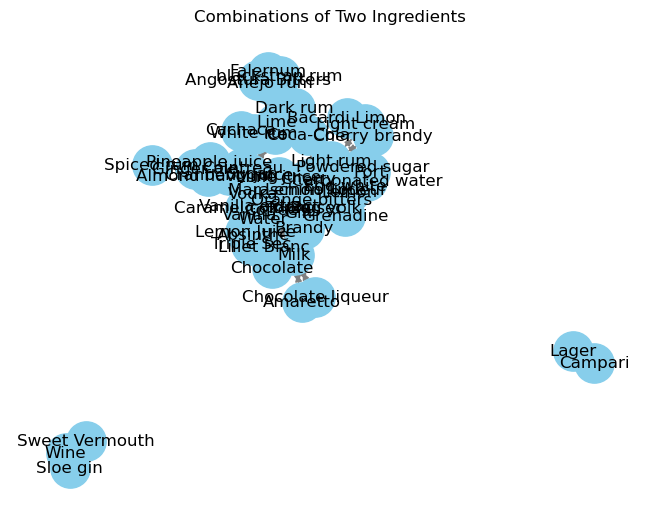

In [97]:
import itertools
import networkx as nx

# Create an empty directed graph
G = nx.DiGraph()

# Add all possible combinations of two ingredients as edges in the graph with edge weights
for list in all_ingredients:
    for pair in itertools.combinations(list, 2):
        ingredient1 = pair[0]
        ingredient2 = pair[1]
        
        # Check if ingredient1 is already in the graph
        if G.has_node(ingredient1):
            found = False
            # Check if ingredient2 is already a connected edge in the graph for ingredient1
            for edge in G.out_edges(ingredient1, data=True):
                if edge[1] == ingredient2:
                    # Increment the weight by 1 if the edge is not new
                    G[ingredient1][ingredient2]['weight'] += 1
                    found = True
                    break
            # If ingredient2 is a new edge for ingredient1, add it with weight 1
            if not found:
                G.add_edge(ingredient1, ingredient2, weight=1)
        else:
            # If ingredient1 is not in the graph, add it with ingredient2 as the connected edge with weight 1
            G.add_edge(ingredient1, ingredient2, weight=1)

        # Check if ingredient2 is already in the graph
        if G.has_node(ingredient2):
            found = False
            # Check if ingredient2 is already a connected edge in the graph for ingredient1
            for edge in G.out_edges(ingredient2, data=True):
                if edge[1] == ingredient1:
                    # Increment the weight by 1 if the edge is not new
                    G[ingredient2][ingredient1]['weight'] += 1
                    found = True
                    break
            # If ingredient1 is a new edge for ingredient2, add it with weight 1
            if not found:
                G.add_edge(ingredient2, ingredient1, weight=1)
        else:
            # If ingredient2 is not in the graph, add it with ingredient1 as the connected edge with weight 1
            G.add_edge(ingredient2, ingredient1, weight=1)

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=800, font_size=12, font_color='black', node_color='skyblue', edge_color='gray')
plt.title('Combinations of Two Ingredients')
plt.show()


In [99]:
# Get a list of all nodes in the graph
# nodes_list = list(G.nodes())

print("List of Nodes: ", G.nodes())

List of Nodes:  ['Gin', 'Maraschino liqueur', 'Lemon juice', 'Orange bitters', 'Cherry', 'Coffee', 'Milk', 'Triple sec', 'Brandy', 'Sugar', 'Lime', 'Cachaca', 'Spiced rum', 'Ginger ale', 'Dark rum', 'Coca-Cola', 'Ice', 'Light rum', 'Cherry brandy', 'Light cream', 'Falernum', 'Angostura Bitters', 'Añejo rum', 'blackstrap rum', 'Bacardi Limon', 'Lime juice', 'Grenadine', 'Lemon', 'Egg white', 'White rum', 'Lager', 'Campari', 'Port', 'Powdered sugar', 'Carbonated water', 'Vodka', 'Cointreau', 'Cranberry juice', 'Water', 'Vanilla', 'Caramel coloring', 'Egg yolk', 'Triple Sec', 'Lillet Blanc', 'Lemon Juice', 'Absinthe', 'Chocolate liqueur', 'Amaretto', 'Sweet Vermouth', 'Sloe gin', 'Wine', 'Vanilla extract', 'Chocolate', 'Pineapple juice', 'Almond flavoring']


In [100]:
# Get the largest connected component
largest_cc = max(nx.strongly_connected_components(G), key=len)

# Create a subgraph containing only the nodes and edges in the largest connected component
connected_nodes = G.subgraph(largest_cc)

# Print the nodes in the largest connected component
print("Nodes in the Largest Connected Component: ", connected_nodes.nodes())

Nodes in the Largest Connected Component:  ['Gin', 'Maraschino liqueur', 'Lemon juice', 'Orange bitters', 'Cherry', 'Coffee', 'Milk', 'Triple sec', 'Brandy', 'Sugar', 'Lime', 'Cachaca', 'Spiced rum', 'Ginger ale', 'Dark rum', 'Coca-Cola', 'Ice', 'Light rum', 'Cherry brandy', 'Light cream', 'Falernum', 'Angostura Bitters', 'Añejo rum', 'blackstrap rum', 'Bacardi Limon', 'Lime juice', 'Grenadine', 'Lemon', 'Egg white', 'White rum', 'Port', 'Powdered sugar', 'Carbonated water', 'Vodka', 'Cointreau', 'Cranberry juice', 'Water', 'Vanilla', 'Caramel coloring', 'Egg yolk', 'Triple Sec', 'Lillet Blanc', 'Lemon Juice', 'Absinthe', 'Chocolate liqueur', 'Amaretto', 'Vanilla extract', 'Chocolate', 'Pineapple juice', 'Almond flavoring']


In [53]:
nodes = connected_nodes.nodes()
max_flow = 0
max_start = ''
max_end = ''
max_flow_dict = {}

# Perform network flow analysis for every possible combination of start and end nodes
for start_node in nodes:
    for end_node in nodes:
        if start_node != end_node:
            # Use the Ford-Fulkerson algorithm to find the maximum flow in the graph
            flow_value, flow_dict = nx.maximum_flow(connected_nodes, start_node, end_node)

            if flow_value > max_flow:
                max_flow = flow_value
                max_start = start_node
                max_end = end_node
                max_flow_dict = flow_dict

print("Start Node: " + max_start)
print("End Node: " + max_end)
print("Max Flow: " + str(max_flow))
print("Flow Dict: " + str(max_flow_dict))
print("---------------")

Start Node: Coffee
End Node: Sugar
Max Flow: 12
Flow Dict: {'Gin': {'Maraschino liqueur': 0, 'Lemon juice': 0, 'Orange bitters': 0, 'Cherry': 0, 'Grenadine': 0, 'Lemon': 0, 'Egg white': 0, 'Egg yolk': 0, 'Triple Sec': 0, 'Lillet Blanc': 0, 'Lemon Juice': 0, 'Absinthe': 0}, 'Maraschino liqueur': {'Gin': 0, 'Lemon juice': 0, 'Orange bitters': 0, 'Cherry': 0, 'Light rum': 0, 'Triple sec': 0, 'Lime juice': 0, 'Egg yolk': 0}, 'Lemon juice': {'Gin': 0, 'Maraschino liqueur': 0, 'Orange bitters': 0, 'Cherry': 0, 'Brandy': 0, 'Triple sec': 0, 'Egg yolk': 0, 'Coca-Cola': 1}, 'Orange bitters': {'Gin': 0, 'Maraschino liqueur': 0, 'Lemon juice': 0, 'Cherry': 0, 'Egg yolk': 0}, 'Cherry': {'Gin': 0, 'Maraschino liqueur': 0, 'Lemon juice': 0, 'Orange bitters': 0}, 'Coffee': {'Milk': 1, 'Triple sec': 1, 'Brandy': 1, 'Water': 2, 'Sugar': 2, 'Vanilla': 1, 'Vodka': 2, 'Caramel coloring': 1, 'Vanilla extract': 1}, 'Milk': {'Coffee': 0, 'Triple sec': 0, 'Brandy': 0, 'Chocolate liqueur': 0, 'Amaretto': 0, 'C

#### Get non-zero flows

In [55]:
non_zero_flows = {}  # Dictionary to store non-zero flow values and keys

# Iterate through the flow_dict
for source_node in max_flow_dict:
    for target_node, flow_value in max_flow_dict[source_node].items():
        if flow_value > 0:
            # Add non-zero flow value and keys to the dictionary
            non_zero_flows[(source_node, target_node)] = flow_value

# Extract keys and non-zero flow values
keys = non_zero_flows.keys()
values = non_zero_flows.values()

# Print keys and non-zero flow values
print("Keys:")
print(keys)
print("Non-zero Flow Values:")
print(values)


Keys:
dict_keys([('Lemon juice', 'Coca-Cola'), ('Coffee', 'Milk'), ('Coffee', 'Triple sec'), ('Coffee', 'Brandy'), ('Coffee', 'Water'), ('Coffee', 'Sugar'), ('Coffee', 'Vanilla'), ('Coffee', 'Vodka'), ('Coffee', 'Caramel coloring'), ('Coffee', 'Vanilla extract'), ('Milk', 'Chocolate'), ('Milk', 'Water'), ('Triple sec', 'Milk'), ('Brandy', 'Lemon juice'), ('Lime', 'Sugar'), ('Ginger ale', 'Sugar'), ('Coca-Cola', 'Lime'), ('Lime juice', 'Cranberry juice'), ('Vodka', 'Lime juice'), ('Vodka', 'Cranberry juice'), ('Vodka', 'Sugar'), ('Vodka', 'Vanilla'), ('Cranberry juice', 'Sugar'), ('Cranberry juice', 'Ginger ale'), ('Water', 'Sugar'), ('Water', 'Vodka'), ('Vanilla', 'Sugar'), ('Vanilla', 'Caramel coloring'), ('Caramel coloring', 'Sugar'), ('Caramel coloring', 'Vodka'), ('Vanilla extract', 'Sugar'), ('Chocolate', 'Water')])
Non-zero Flow Values:
dict_values([1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1])


### Maximum path instead

In [101]:
# Compute all maximum-valued paths in the graph
max_valued_paths = nx.all_pairs_dijkstra_path(connected_nodes, weight='weight')

In [104]:
print(max_valued_paths)

<generator object all_pairs_dijkstra_path at 0x000001609DE2D7B0>


In [106]:
# Sort maximum-valued paths by their values in descending order
sorted_paths = sorted(max_valued_paths, key=lambda x: max(nx.path_weight(G, p, weight='weight') for p in x[1].values()), reverse=False)

# Print all maximum-valued paths and their values
for source_node, paths in sorted_paths:
    print("Maximum-Valued Paths from", source_node, ":")
    for target_node, path in paths.items():
        value = nx.path_weight(G, path, weight='weight')
        print("  To", target_node, ": Path =", path, ", Value =", value)

In [87]:
# Find the maximum value among the values of all paths
max_value = max(max(nx.path_weight(connected_nodes, p, weight='weight') for p in paths.values()) for _, paths in max_valued_paths)

# Find the path with the largest value among all maximum-valued paths
largest_value = float('-inf')
largest_value_path = None

for _, paths in max_valued_paths:
    print(paths)
    for target_node, path in paths.items():
        value = nx.path_weight(connected_nodes, path, weight='weight')
        if value == max_value and value > largest_value:
            largest_value = value
            largest_value_path = path

print("Path with the largest value among all maximum-valued paths:")
print("Path =", largest_value_path, ", Value =", largest_value)

Path with the largest value among all maximum-valued paths:
Path = None , Value = -inf
